## Homework 9: Model-free (RL) Prediction with Eligibility Traces (TD(Lambda))
### 1. Implement Forward-View TD(Lambda) algorithm for Value Function Prediction
$$
G_{t}^{(n)}=R_{t+1}+\gamma R_{t+2}+\ldots+\gamma^{n-1} R_{t+n}+\gamma^{n} V\left(S_{t+n}\right)
$$
$$
G_{t}^{\lambda}=(1-\lambda) \sum_{n=1}^{\infty} \lambda^{n-1} G_{t}^{(n)}
$$
$$
V\left(S_{t}\right) \leftarrow V\left(S_{t}\right)+\alpha\left(G_{t}^{\lambda}-V\left(S_{t}\right)\right)
$$

In [7]:
from src.tdlambda import TDLambda
from src.mdp_refined import MDPRefined

mdp_refined_data = {
        1: {
            'a': {1: (0.3, 9.2), 2: (0.6, 4.5), 3: (0.1, 5.0)},
            'b': {2: (0.3, -0.5), 3: (0.7, 2.6)},
            'c': {1: (0.2, 4.8), 2: (0.4, -4.9), 3: (0.4, 0.0)}
        },
        2: {
            'a': {1: (0.3, 9.8), 2: (0.6, 6.7), 3: (0.1, 1.8)},
            'c': {1: (0.2, 4.8), 2: (0.4, 9.2), 3: (0.4, -8.2)}
        },
        3: {
            'a': {3: (1.0, 0.0)},
            'b': {3: (1.0, 0.0)}
        }
    }
gamma_val = 0.9
mdp_ref_obj1 = MDPRefined(mdp_refined_data, gamma_val)
mdp_rep_obj = mdp_ref_obj1.get_mdp_rep_for_rl_tabular()
epsilon_val = 0.1
epsilon_half_life_val = 100
learning_rate_val = 0.1
learning_rate_decay_val = 1e6
lambda_val = 0.5
episodes_limit = 1000
max_steps_val = 1000
esl_obj = TDLambda(
        mdp_rep_obj,
        epsilon_val,
        epsilon_half_life_val,
        learning_rate_val,
        learning_rate_decay_val,
        lambda_val,
        episodes_limit,
        max_steps_val
    )

policy_data = {
        1: {'a': 0.4, 'b': 0.6},
        2: {'a': 0.7, 'c': 0.3},
        3: {'b': 1.0}
    }


print("Value function estimates with forward TD-lambd")
print(esl_obj.forward_value_func(policy_data))

Value function estimates with forward TD-lambd
{1: 10.801185840387696, 2: 18.39571663204502, 3: 0.0}


### 2. Implement Backward View TD(Lambda)
$$
E_{t}(s)=\gamma \lambda E_{t-1}(s)+\mathbf{1}\left(S_{t}=s\right)
$$
$$
V(s) \leftarrow V(s)+\alpha \delta_{t} E_{t}(s)
$$

In [11]:
print("Value function estimates with backward TD-lambd")
print(esl_obj.backward_value_func(policy_data))

Value function estimates with backward TD-lambd
{1: 9.175001562063924, 2: 17.10175611937374, 3: 0.0}


### 3. Test it against DP policy evaluation

In [13]:
val_dp = mdp_ref_obj1.policy_evaluation(policy_data)
print("Policy Evaluation: ")
print(val_dp)

Policy Evaluation: 
{1: 10.320570378088227, 2: 15.396689886917194}


### 4. Plot their accuracy as a function of Lambda

Processing...
Finish 0.1 percent
Finish 0.2 percent
Finish 0.3 percent
Finish 0.4 percent
Finish 0.5 percent
Finish 0.6 percent
Finish 0.7 percent
Finish 0.8 percent
Finish 0.9 percent
Finish 1.0 percent


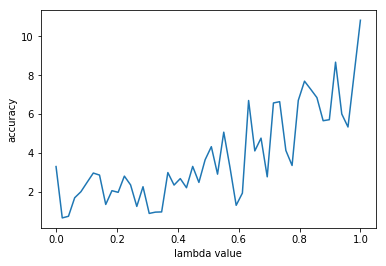

In [24]:
import numpy as np
import matplotlib.pyplot as plt

lambda_list = np.linspace(0,1,50)
acc = []
print('Processing...')
for t, lambda_val in enumerate(lambda_list):
    esl_obj = TDLambda(
        mdp_rep_obj,
        epsilon_val,
        epsilon_half_life_val,
        learning_rate_val,
        learning_rate_decay_val,
        lambda_val,
        episodes_limit,
        max_steps_val
    )
    val = {1:0, 2:0, 3:0}
    for i in range(20):
        val_sim =  esl_obj.backward_value_func(policy_data)
        for k,v in val_sim.items():
            val[k] += v
    val = {k: v/20 for k,v in val.items()}
    acc.append(sum([np.abs(v - val_dp[s]) for s,v in val.items() if s < 3]))
    if (t+1) % 5 == 0:
        print("Finish {} percent".format((t+1)/50))

plt.plot(lambda_list, acc)
plt.xlabel('lambda value')
plt.ylabel('accuracy')
plt.show()